In [25]:
import os
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

In [26]:
def exponential_model(x,a,b,c):
    return np.exp(b*(x-c))

def get_exp_fit(country):
    if country == "Iceland":
        return 0
    y = df.loc[country].values
    y = np.trim_zeros(y)
    if y.size < 7:
        return 0
    x = list(range(0,y.size,1))
    exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1])
    return (exp_fit[0][1])

In [27]:
csv = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

df = pd.read_csv(csv,index_col="Country/Region")
del df['Lat']
del df['Long']
del df['Province/State']

df = df.groupby(['Country/Region']).sum()

/Users/karlpetersson/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


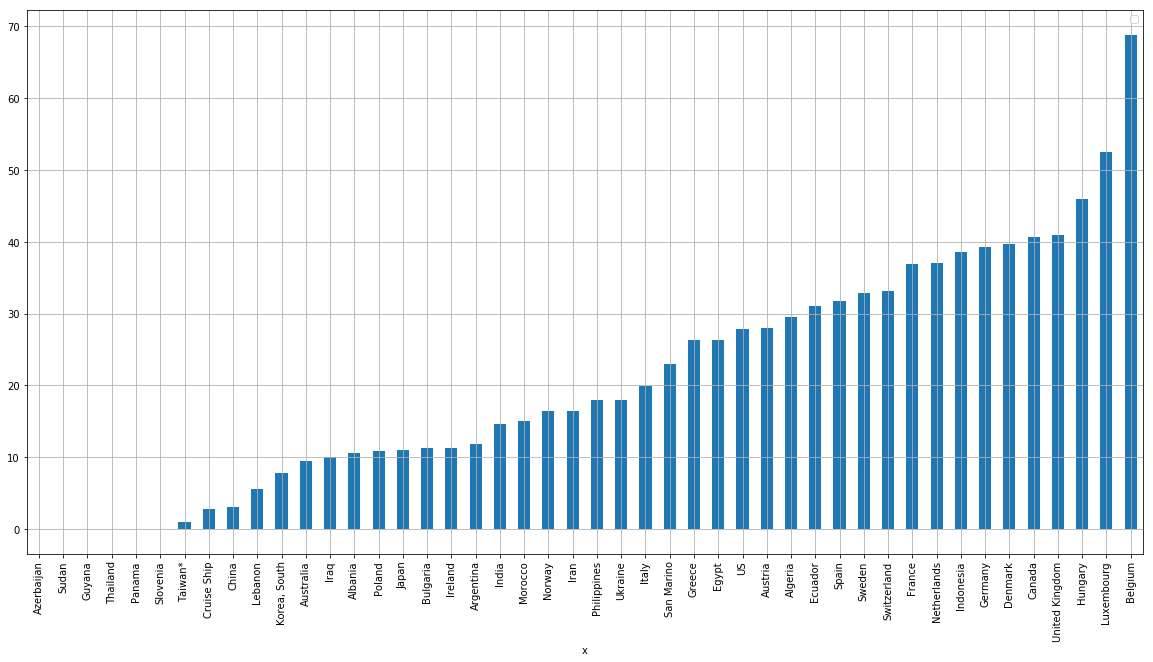

In [28]:
result = dict()
for i, j in df.iterrows(): 
    a = get_exp_fit(i)
    if a != 0:
        result[i] = a

sorted_result = sorted(result.items(), key=lambda kv: kv[1])

labels = []
values = []
for i in sorted_result:
    labels.append(i[0])
    values.append(((np.exp(i[1]))-1)*100)

df2 = pd.DataFrame({'x' : labels, 'y' : values})
df2.set_index("x",drop=True,inplace=True)
ax = df2.plot(kind="bar")
ax.legend([])

plt.xticks(rotation=90)
plt.grid()
plt.rcParams["figure.figsize"] = (20,10)

plt.show()